# Pre-Processing

In [1]:
#imports 
import pandas as pd
import os
import random
import os
import math
import numpy as np

from PIL import Image
from skimage import io
from skimage import exposure

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import pickle
import os
import cv2

In [3]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import AUC
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2


warnings.simplefilter(action='ignore', category=Warning)

In [4]:
train_df = pd.read_csv('Training_Labels.csv')
test_df = pd.read_csv('Testing_Labels.csv')

train_df.dropna(axis = 1, inplace = True)
train_df['Image name'] = train_df['Image name'] + '.jpg'
train_df['Retinopathy grade'] = train_df['Retinopathy grade'].astype(str)
test_df['Image name'] = test_df['Image name'] + '.jpg'
test_df['Retinopathy grade'] = test_df['Retinopathy grade'].astype(str)
train_df

,Image name,Retinopathy grade,Risk of macular edema
0,IDRiD_001.jpg,3,2
1,IDRiD_002.jpg,3,2
2,IDRiD_003.jpg,2,2
3,IDRiD_004.jpg,3,2
4,IDRiD_005.jpg,4,0
...,...,...,...
408,IDRiD_409.jpg,2,1
409,IDRiD_410.jpg,2,0
410,IDRiD_411.jpg,2,0
411,IDRiD_412.jpg,2,0


In [5]:
image_width = 256
image_height = 170

# Directories for Training Data

In [17]:
!mkdir tmp

In [18]:
!mkdir tmp\train

In [19]:
!mkdir tmp\train\0
!mkdir tmp\train\1
!mkdir tmp\train\2
!mkdir tmp\train\3
!mkdir tmp\train\4

In [20]:
image_name_list = []
for image_name in train_df['Image name']:
    image_name_list.append(image_name)


label_list = []
for label in train_df['Retinopathy grade']:
    label_list.append(label)

In [21]:
# image_name_list

In [22]:
# label_list

In [23]:
import shutil
image_dir = 'train/'
output_dir = 'tmp/train/'

class_labels = ['0','1','2','3','4']

In [24]:
for image_path, label in zip(image_name_list, label_list):
    image_filename = os.path.basename(image_path)
    image_loc = image_dir + image_filename
    label = int(label)
    output_class_dir = os.path.join(output_dir, class_labels[label])
    output_image_path = output_class_dir + '/' + image_filename
    shutil.move(image_loc, output_image_path)

# Directories for Testing Data

In [25]:
!mkdir tmp_test

In [26]:
!mkdir tmp_test\test

In [27]:
!mkdir tmp_test\test\0
!mkdir tmp_test\test\1
!mkdir tmp_test\test\2
!mkdir tmp_test\test\3
!mkdir tmp_test\test\4

In [28]:
image_name_list_test = []
for image_name in test_df['Image name']:
    image_name_list_test.append(image_name)


label_list_test = []
for label in test_df['Retinopathy grade']:
    label_list_test.append(label)
    
image_name_list_test

In [29]:
# label_list_test

In [30]:
import shutil
image_dir = 'test/'
output_dir = 'tmp_test/test/'

class_labels = ['0','1','2','3','4']

In [31]:
for image_path, label in zip(image_name_list_test, label_list_test):
    image_filename = os.path.basename(image_path)
    image_loc = image_dir + image_filename
#     print(image_filename, label)
    label = int(label)
    output_class_dir = os.path.join(output_dir, class_labels[label])
#     output_image_path = os.path.join(output_class_dir, image_filename)
    output_image_path = output_class_dir + '/' + image_filename
    shutil.move(image_loc, output_image_path)

# Create Directories for Augmented images

In [32]:
!mkdir augmented_images

In [33]:
!mkdir augmented_images\train

In [34]:
!mkdir augmented_images\train\0
!mkdir augmented_images\train\1
!mkdir augmented_images\train\2
!mkdir augmented_images\train\3
!mkdir augmented_images\train\4

# Augmented Images for class '0'

In [35]:
import tensorflow as tf
from tensorflow.keras.utils import load_img

original_image_dir = 'tmp/train/0/'

# Directory to save the augmented images
augmented_image_dir = 'augmented_images/train/0/'

# Create an ImageDataGenerator with desired augmentation configurations
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images by random angle (0-20 degrees)
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True  # Flip images vertically
)

# Iterate through the original image directory
for filename in os.listdir(original_image_dir):
    # Load the image
    image_path = os.path.join(original_image_dir, filename)
    image = load_img(image_path)  # Implement a function to load the image

    # Reshape the image to match the expected input shape of the generator
    image = np.expand_dims(image, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(image, batch_size=1, save_to_dir=augmented_image_dir, save_prefix='aug_', save_format='jpg'):
        i += 1
        if i > 4:  # Generate 4 augmented images per original image
            break

# Augmented Images for class '1'

In [36]:
import tensorflow as tf
from tensorflow.keras.utils import load_img

original_image_dir = 'tmp/train/1/'

augmented_image_dir = 'augmented_images/train/1/'

datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=True  
)

for filename in os.listdir(original_image_dir):
    # Load the image
    image_path = os.path.join(original_image_dir, filename)
    image = load_img(image_path)  

    image = np.expand_dims(image, axis=0)

    i = 0
    for batch in datagen.flow(image, batch_size=1, save_to_dir=augmented_image_dir, save_prefix='aug_', save_format='jpg'):
        i += 1
        if i > 25:
            break

# Augmented Images for class '2'

In [37]:
import tensorflow as tf
from tensorflow.keras.utils import load_img

original_image_dir = 'tmp/train/2/'

augmented_image_dir = 'augmented_images/train/2/'

datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=True  
)

for filename in os.listdir(original_image_dir):
    # Load the image
    image_path = os.path.join(original_image_dir, filename)
    image = load_img(image_path)  

    image = np.expand_dims(image, axis=0)

    i = 0
    for batch in datagen.flow(image, batch_size=1, save_to_dir=augmented_image_dir, save_prefix='aug_', save_format='jpg'):
        i += 1
        if i > 4:
            break

# Augmented Images for class '3'

In [38]:
import tensorflow as tf
from tensorflow.keras.utils import load_img

original_image_dir = 'tmp/train/3/'

augmented_image_dir = 'augmented_images/train/3/'

datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=True  
)

for filename in os.listdir(original_image_dir):
    # Load the image
    image_path = os.path.join(original_image_dir, filename)
    image = load_img(image_path)  

    image = np.expand_dims(image, axis=0)

    i = 0
    for batch in datagen.flow(image, batch_size=1, save_to_dir=augmented_image_dir, save_prefix='aug_', save_format='jpg'):
        i += 1
        if i > 8:
            break

# Augmented Images for class '4'

In [39]:
import tensorflow as tf
from tensorflow.keras.utils import load_img

original_image_dir = 'tmp/train/4/'

augmented_image_dir = 'augmented_images/train/4/'

datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=True  
)

for filename in os.listdir(original_image_dir):
    # Load the image
    image_path = os.path.join(original_image_dir, filename)
    image = load_img(image_path)  

    image = np.expand_dims(image, axis=0)

    i = 0
    for batch in datagen.flow(image, batch_size=1, save_to_dir=augmented_image_dir, save_prefix='aug_', save_format='jpg'):
        i += 1
        if i > 11:
            break

# Loading the data

In [6]:
train_path = ('augmented_images/train/')
test_path = ('tmp_test/test/')
image_width = 225
image_height = 150

In [25]:
# img = plt.imread('augmented_images/train/0/aug__0_4.jpg')
# plt.imshow(img)

In [41]:
def read_data(path,image_width,image_height):
    X = []
    y = []
    labels = os.listdir(path)
    for label in labels:
        for image in tqdm(os.listdir(path + label)):
            img = cv2.imread(os.path.join(path + label,image))
            img = cv2.resize(img,(image_width, image_height))
            X.append(img)
            y.append(label)
    return np.array(X), np.array(y)

In [42]:
X_train, y_train = read_data(train_path,image_width,image_height)

100%|████████████████████████████████████████████████████████████████████████████████| 571/571 [01:06<00:00,  8.55it/s]


In [43]:
X_test, y_test = read_data(test_path,image_width,image_height)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:01<00:00,  9.09it/s]


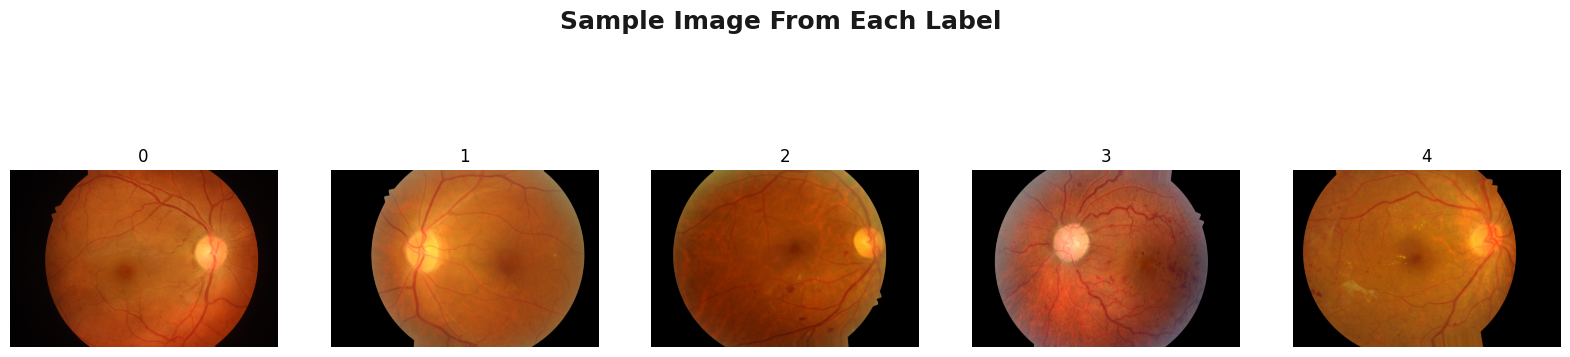

In [26]:
fig, ax = plt.subplots(1,5,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
         color="black",y=0.61,x=0.4,alpha=0.9)
for count, ele in enumerate(os.listdir(train_path)):
    for j in os.listdir(train_path+ele):
#         img= cv2.imread(train_path+ele+'/'+j)
        img = plt.imread(train_path+ele+'/'+j)
        ax[count].imshow(img)
        ax[count].set_title(ele)
        ax[count].axis('off')
        break

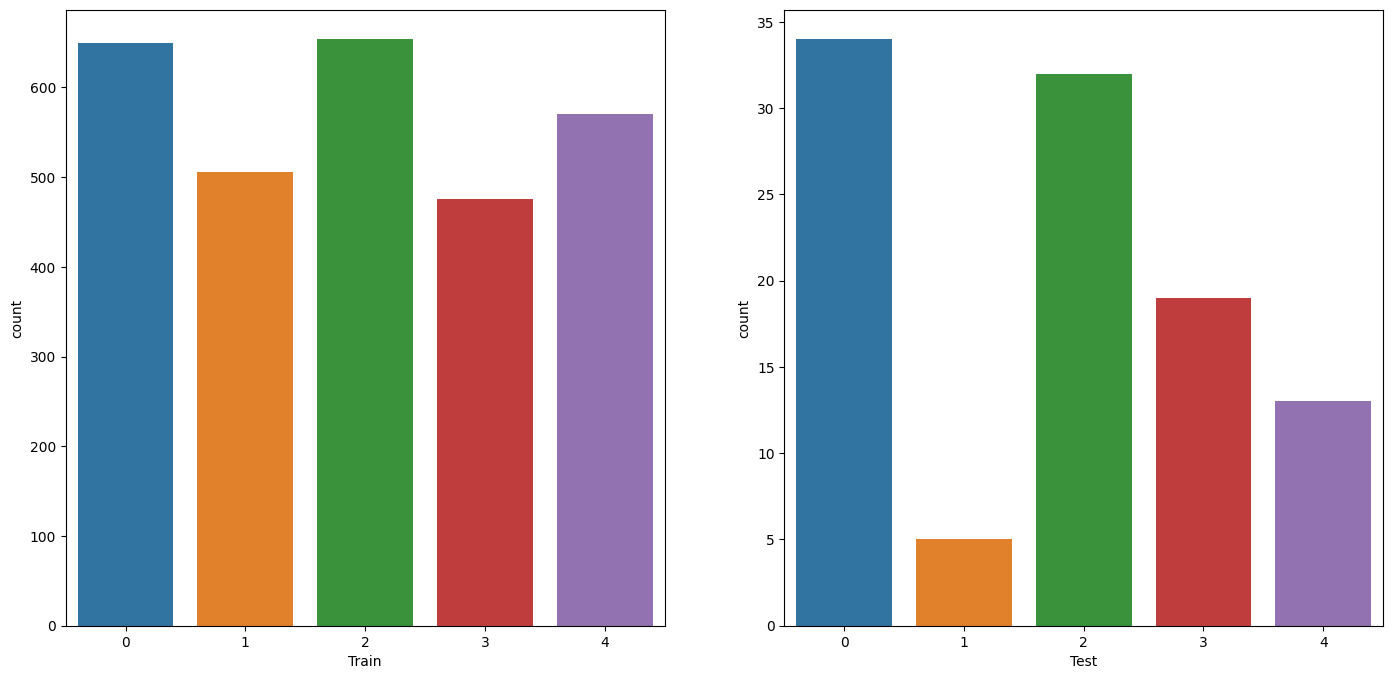

In [45]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([y_train, y_test]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

In [46]:
X_train, y_train = shuffle(X_train, y_train, random_state=31)

In [47]:
X_test, y_test = shuffle(X_test, y_test, random_state=31)

In [48]:
print(f"X Train shape is --> {X_train.shape}\ny Train shape is --> {y_train.shape}\nX Test shape is --> {X_test.shape}\ny Test shape is --> {y_test.shape}")

X Train shape is --> (2857, 150, 225, 3)
y Train shape is --> (2857,)
X Test shape is --> (103, 150, 225, 3)
y Test shape is --> (103,)


# Training

In [49]:
datagen = ImageDataGenerator()
datagen.fit(X_train)

In [50]:
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

In [52]:
y_train

array(['2', '2', '3', ..., '4', '3', '1'], dtype='<U1')

In [51]:
y_train_encoded

,0,1,2,3,4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
2852,1,0,0,0,0
2853,0,1,0,0,0
2854,0,0,0,0,1
2855,0,0,0,1,0


In [41]:
resnet_v2 = InceptionResNetV2(include_top=False,
    weights='imagenet',
    input_shape=(image_height, image_width, 3))

In [42]:
model = resnet_v2.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.55)(model)
model = tf.keras.layers.Dense(60,activation='elu',kernel_initializer='GlorotNormal')(model)
model = tf.keras.layers.Dropout(rate=0.3)(model)
model = tf.keras.layers.Dense(5,activation='softmax')(model)
model = tf.keras.models.Model(inputs=resnet_v2.input, outputs = model)

In [43]:
# opt = Adam(
#     learning_rate=0.000016, beta_1=0.91, beta_2=0.9994,
#     epsilon=1e-08)
model.compile(loss='categorical_crossentropy',optimizer = "Adam", metrics= ['accuracy'])

In [44]:
import datetime
tensorboard = TensorBoard(log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
checkpoint = ModelCheckpoint("resnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

In [45]:
history = model.fit(X_train,y_train_encoded.to_numpy(),validation_split=0.3, epochs =15, verbose=1, batch_size=32,
                   callbacks=[tensorboard, reduce_lr, early_stopping_cb, checkpoint])

Epoch 1/15
63/63 [==============================] - ETA: 0s - loss: 1.1539 - accuracy: 0.5323 
Epoch 1: val_accuracy improved from -inf to 0.24126, saving model to resnet.h5
63/63 [==============================] - 980s 14s/step - loss: 1.1539 - accuracy: 0.5323 - val_loss: 2.5096 - val_accuracy: 0.2413 - lr: 0.0010
Epoch 2/15
63/63 [==============================] - ETA: 0s - loss: 0.6311 - accuracy: 0.7614 
Epoch 2: val_accuracy improved from 0.24126 to 0.31818, saving model to resnet.h5
63/63 [==============================] - 884s 14s/step - loss: 0.6311 - accuracy: 0.7614 - val_loss: 3.2188 - val_accuracy: 0.3182 - lr: 0.0010
Epoch 3/15
63/63 [==============================] - ETA: 0s - loss: 0.5155 - accuracy: 0.8069 
Epoch 3: val_accuracy improved from 0.31818 to 0.47086, saving model to resnet.h5
63/63 [==============================] - 896s 14s/step - loss: 0.5155 - accuracy: 0.8069 - val_loss: 2.4597 - val_accuracy: 0.4709 - lr: 0.0010
Epoch 4/15
63/63 [======================

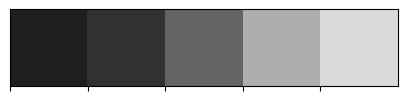

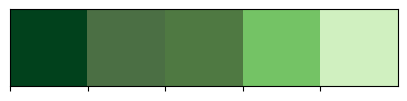

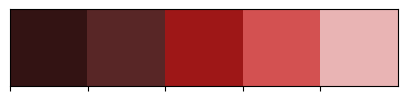

In [46]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

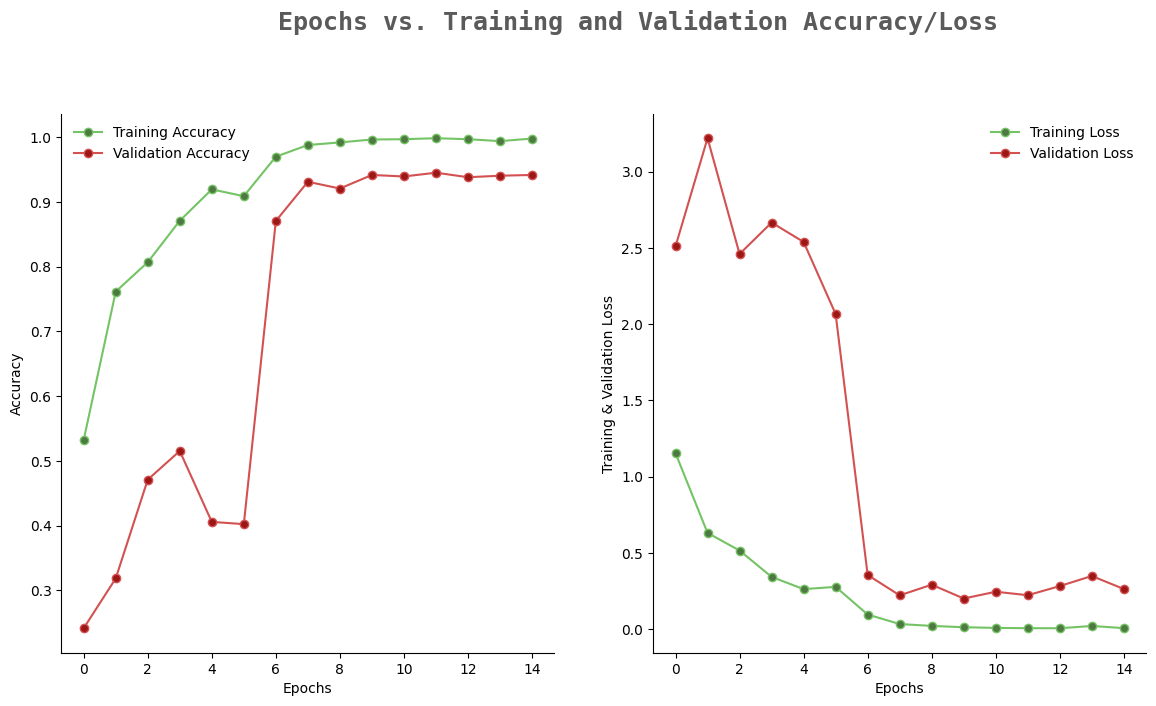

In [47]:
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs_count = [i for i in range(len(train_acc))]

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs_count, train_acc, marker='o',markerfacecolor=colors_green[2], color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs_count, val_acc, marker='o',markerfacecolor=colors_red[2], color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs_count, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs_count, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [2]:
loss, accuracy = model.evaluate(X_test,y_test_encoded)

#print accuracy    
print('Accuracy: %f' % (accuracy*100))

4/4 [==============================] - 6s 1s/step - loss: 0.3692 - accuracy: 0.7849
Accuracy: 78.485438
